Using Gemini, Learning LangChain Framework and Tracking with LangSmith

REF :
- https://python.langchain.com/docs/integrations/chat/google_generative_ai/

####Call Google-generative (Gemini) API

In [ ]:
%%capture
!pip install -qU langchain-google-genai

In [ ]:
import getpass
import os

os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter your Google AI API key: ")

Enter your Google AI API key: ··········


In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)

To enable automated tracing of your model calls, **set your LangSmith API key**:

1. Create an account

      Sign up at [smith.langchain.com](https://smith.langchain.com) (no credit card required). You can log in with Google, GitHub, or email.

2. Create an API key
      
      Go to `Developer` (top right) → `API Keys` → `Create API Key`. Copy the key and save it securely.

In [ ]:
os.environ["LANGSMITH_API_KEY"] = getpass.getpass("Enter your LangSmith API key: ")

Enter your LangSmith API key: ··········


Just run this line, LangSmith will automatically track your runs.

In [ ]:
os.environ["LANGSMITH_TRACING"] = "true"

All LLM executions in this Google Colab will be logged on the LangSmith website.

###Playground

In this section, we will experiment and check the logs in the LangSmith UI afterward to observe the results.

####Simple Invocation

In [ ]:
messages = [
    (
        "system",
        "You are a helpful assistant that translates English to French. Translate the user sentence.",
    ),
    ("human", "I love programming."),
]
ai_msg = llm.invoke(messages)
ai_msg

AIMessage(content="J'adore la programmation.", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'grounding_metadata': {}, 'model_provider': 'google_genai'}, id='lc_run--23e8f143-ae69-4137-8a40-bef25de5f29d-0', usage_metadata={'input_tokens': 21, 'output_tokens': 7, 'total_tokens': 28, 'input_token_details': {'cache_read': 0}})

In [ ]:
print(ai_msg.content)

J'adore la programmation.


- Check automated log in LangSmith website.

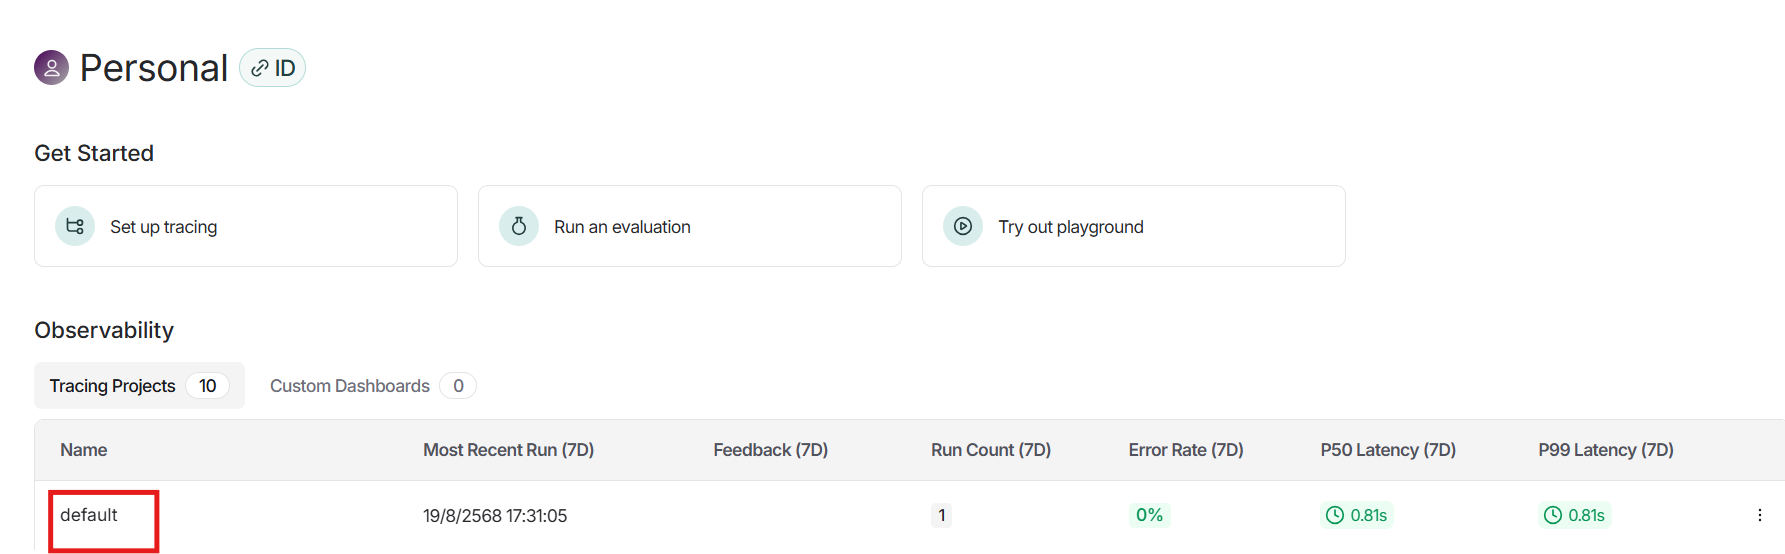

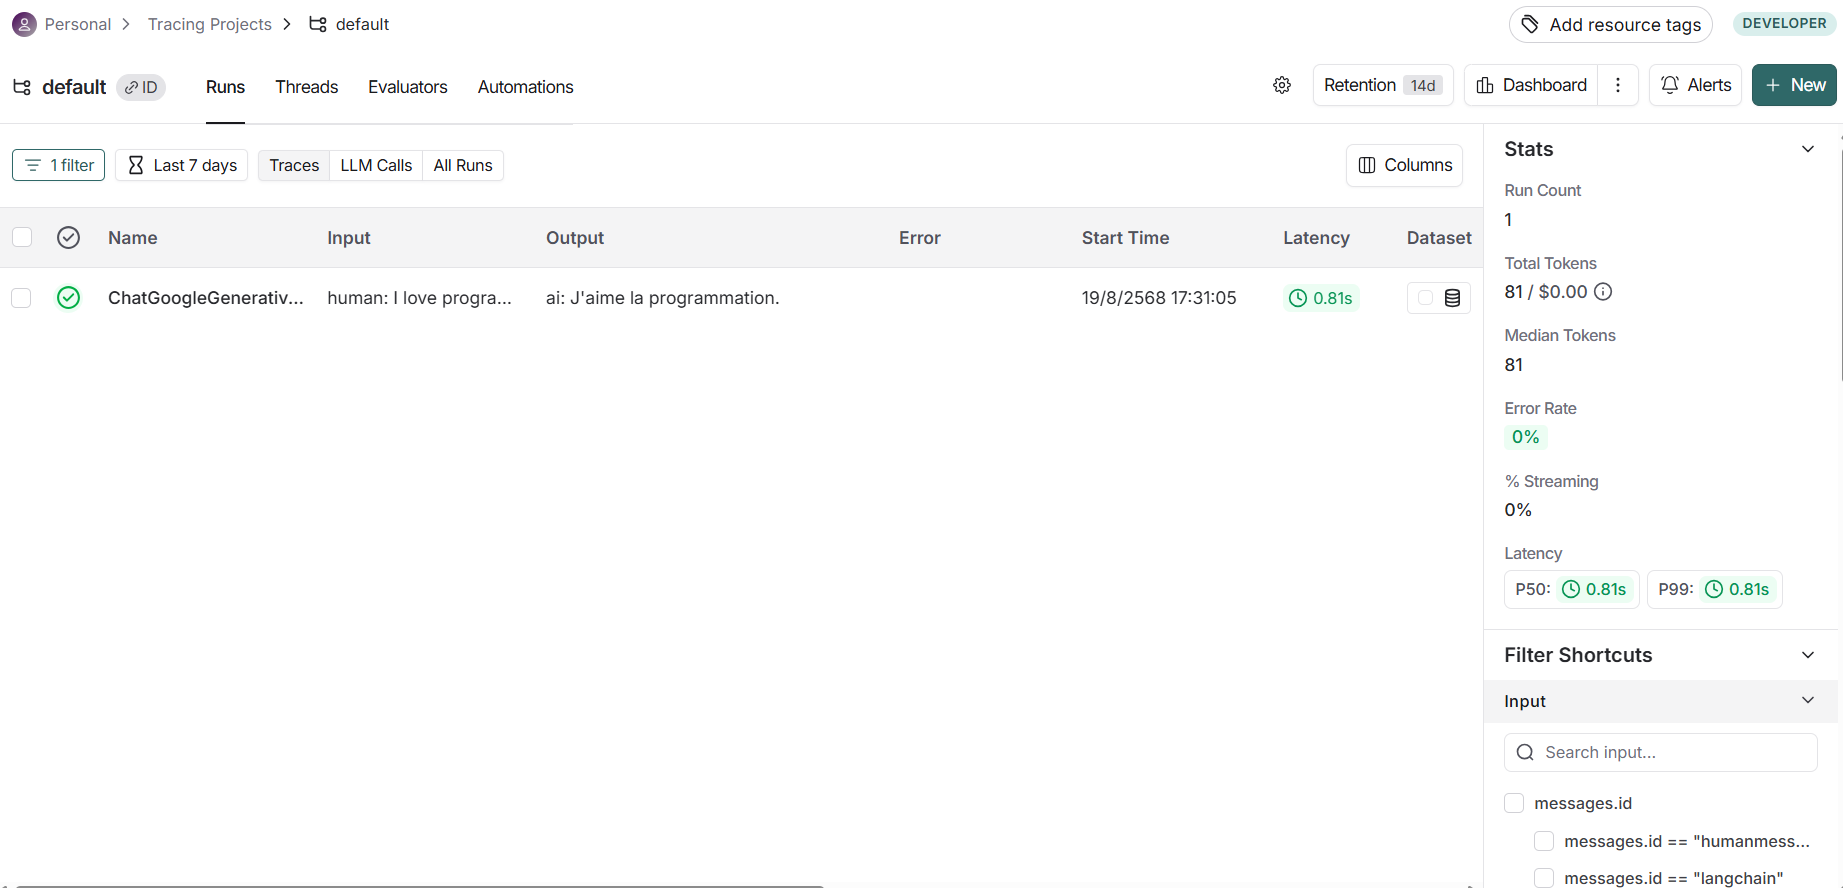

####Chaining

- LangChain supports pipe operator.
- ex. `prompt | llm`

  - Receive input from the user → insert it into the prompt (template/formatter)
  - The result from the prompt → is passed to the LLM (model)
  - The output from the model → becomes the final answer

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages(  # prompt template contains three fields : input_language, output_language, input
    [
        (
            "system",
            "You are a helpful assistant that translates {input_language} to {output_language}.",
        ),
        ("human", "{input}"),
    ]
)

chain = prompt | llm # this line !
chain.invoke(
    {
        "input_language": "English", # this input_language from user is passed into defined prompt template, in this case, input_language = 'English'
        "output_language": "German", # this output_language from user is passed into defined prompt template, in this case, input_language = 'German'
        "input": "I love programming.", # this input from user is passed into defined prompt template, in this case, input_language = 'I love programming'
    }
)

AIMessage(content='Ich liebe das Programmieren.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'grounding_metadata': {}, 'model_provider': 'google_genai'}, id='lc_run--e7ab6a85-1880-44e1-b9cd-dc141bea561f-0', usage_metadata={'input_tokens': 16, 'output_tokens': 191, 'total_tokens': 207, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 185}})

####Multimodal Usage

#####Image

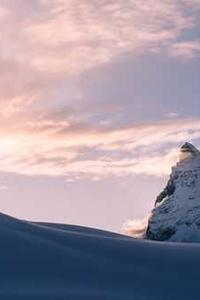

In [ ]:
import base64 # for encoding an image file into a text-like format (base64)

from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

# Example using a public URL (remains the same)
message_url = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Describe the image at the URL.",
        },
        {"type": "image_url", "image_url": "https://picsum.photos/seed/picsum/200/300"},
    ]
)
result_url = llm.invoke([message_url])
print(f"Response for URL image: {result_url.content}")

Response for URL image: This image depicts a serene and majestic winter mountain landscape, likely captured during either sunrise or sunset due to the soft, warm lighting.

Here's a breakdown:

*   **Sky:** The upper two-thirds of the image are dominated by a vast sky filled with soft, wispy clouds. These clouds display a beautiful gradient of colors, transitioning from warm hues of soft pink, peach, and light orange on the left to cooler lavenders and pale blues towards the right. The illumination suggests the sun is low on the horizon, casting a gentle glow.
*   **Foreground/Midground:** Below the horizon, the foreground consists of gently undulating, snow-covered terrain. This snow is rendered in deep indigo and purplish-blue tones, suggesting it is largely in shadow, reflecting the cool tones of the sky or the absence of direct sunlight.
*   **Mountain Peak:** On the far right side of the image, a dramatic, jagged mountain peak rises sharply. Its snow-covered slopes are mostly in s

#####Audio

1. Download this audio file from Kaggle (https://www.kaggle.com/datasets/pavanelisetty/sample-audio-files-for-speech-recognition?resource=download)
2. Upload the file into this Google Colab
3. Unzip the file using the code below

In [ ]:
!unzip /content/*.zip

Archive:  /content/archive.zip
  inflating: harvard.wav             
  inflating: jackhammer.wav          


In [ ]:
import base64 # for encoding an audio file into a text-like format (base64)

from langchain_core.messages import HumanMessage

audio_file_path = "harvard.wav"
audio_mime_type = "audio/wav" # change it to your audio file type


with open(audio_file_path, "rb") as audio_file:
    encoded_audio = base64.b64encode(audio_file.read()).decode("utf-8")

message = HumanMessage(
    content=[
        {"type": "text", "text": "Transcribe the audio."},
        {
            "type": "media",
            "data": encoded_audio,  # Use base64 string directly
            "mime_type": audio_mime_type,
        },
    ]
)
response = llm.invoke([message])  # Uncomment to run
print(f"Response for audio: {response.content}")

Response for audio: The stale smell of old beer lingers. It takes heat to bring out the odor. A cold dip restores health and zest. A salt pickle tastes fine with ham. Tacos al pastor are my favorite. A zestful food is the hot cross bun.


####Token Usage Tracking

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

result = llm.invoke("Explain the concept of prompt engineering in one sentence.")

print(result.content)
print("\nUsage Metadata:")
print(result.usage_metadata)

Prompt engineering is the discipline of designing, refining, and optimizing inputs (prompts) to effectively guide AI models toward generating specific and desired outputs.

Usage Metadata:
{'input_tokens': 11, 'output_tokens': 530, 'total_tokens': 541, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 501}}


#### LLM with Function Calling (Custom Function)

This is the cycle when we use LLM with function calling via LangChain:
1. Human query is fed to the LLM.
2. LLM generates the input for the function.
3. The function return the result.
4. We combine all messages from 1 to 3
5. Another LLM recieves all messages that we combined in the step 4 and generates the final response.


- **Defined a Function**

In [ ]:
from langchain_core.tools import tool

# Define the tool
@tool(description="Get the current weather in a given location")
def get_weather(location: str) -> str:
    return f"{location} --> it's sunny."

**(1) Human Input Query**

In [ ]:
# Invoke the model with a query that should trigger the tool
query = "What's the weather in San Francisco?"

- LLM with Tool: LLM generates input for calling the function.

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

# Initialize the model and bind the tool
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")
llm_with_tool = llm.bind_tools([get_weather])  # bind our LLM with defined tool

**(2) AI Message: Output from LLM with Tool // Input for calling a function**

In [ ]:
ai_msg = llm_with_tool.invoke(query)
print(ai_msg)

content='' additional_kwargs={'function_call': {'name': 'get_weather', 'arguments': '{"location": "San Francisco"}'}} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'grounding_metadata': {}, 'model_provider': 'google_genai'} id='lc_run--a3aa65a0-fc46-41ab-8234-59ba120f0579-0' tool_calls=[{'name': 'get_weather', 'args': {'location': 'San Francisco'}, 'id': 'e1ee1f3c-6f68-4f3e-ac86-498278fcb55a', 'type': 'tool_call'}] usage_metadata={'input_tokens': 50, 'output_tokens': 82, 'total_tokens': 132, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 66}}


You have received a response structure like this:
- ```content='' additional_kwargs={'function_call': {'name': 'get_weather', 'arguments': '{"location": "San Francisco"}'}} ...```

- This indicates a function call message from the LLM, constructed to call the function with the input : **location = 'San Francisco'**.
The LLM has derived the function input from the user’s query automatically.

**(3) ToolMessage** = **Output that returned from the function.**

In [ ]:
# Example tool call message would be needed here if you were actually running the tool
from langchain_core.messages import ToolMessage

function_input_from_llm = ai_msg.tool_calls[0]["args"]

tool_message = ToolMessage(
    content=get_weather.func(**function_input_from_llm),
    tool_call_id=ai_msg.tool_calls[0]["id"], #
)

In [ ]:
tool_message

ToolMessage(content="San Francisco --> it's sunny.", tool_call_id='e1ee1f3c-6f68-4f3e-ac86-498278fcb55a')

**(4) All messages are packed.**

In [ ]:
all_messages = [HumanMessage(query), ai_msg, tool_message]
all_messages

[HumanMessage(content="What's the weather in San Francisco?", additional_kwargs={}, response_metadata={}),
 AIMessage(content='', additional_kwargs={'function_call': {'name': 'get_weather', 'arguments': '{"location": "San Francisco"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'grounding_metadata': {}, 'model_provider': 'google_genai'}, id='lc_run--a3aa65a0-fc46-41ab-8234-59ba120f0579-0', tool_calls=[{'name': 'get_weather', 'args': {'location': 'San Francisco'}, 'id': 'e1ee1f3c-6f68-4f3e-ac86-498278fcb55a', 'type': 'tool_call'}], usage_metadata={'input_tokens': 50, 'output_tokens': 82, 'total_tokens': 132, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 66}}),
 ToolMessage(content="San Francisco --> it's sunny.", tool_call_id='e1ee1f3c-6f68-4f3e-ac86-498278fcb55a')]

**(5) The final answer will be generated.**

In [ ]:
llm_with_tool.invoke(all_messages)  # Passing tool result back, let LLM create a final response

AIMessage(content='The weather in San Francisco is sunny.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'grounding_metadata': {}, 'model_provider': 'google_genai'}, id='lc_run--ff8b8899-d9ae-4591-9db8-1a8c9505db11-0', usage_metadata={'input_tokens': 88, 'output_tokens': 8, 'total_tokens': 96, 'input_token_details': {'cache_read': 0}})

#### LLM with Google Search

In [ ]:
# import a prebuilt tool from `google.ai.generativelanguage_v1beta.types` package
from google.ai.generativelanguage_v1beta.types import Tool as GenAITool

resp = llm.invoke(
    "When is the next total solar eclipse in US?",
    tools=[GenAITool(google_search={})], # Binded with Prebuilt Tool (Google Search)
)

print(resp.content)

The next total solar eclipse visible in the United States will occur on March 30, 2033, and will be visible only in Alaska.

For the contiguous United States, the next total solar eclipse will take place on August 22, 2044. Another significant total solar eclipse across a wider path of the contiguous U.S. will occur on August 12, 2045, spanning from California to Florida.


In [ ]:
resp # raw response

AIMessage(content='The next total solar eclipse visible in the United States will occur on March 30, 2033, and will be visible only in Alaska.\n\nFor the contiguous United States, the next total solar eclipse will take place on August 22, 2044. Another significant total solar eclipse across a wider path of the contiguous U.S. will occur on August 12, 2045, spanning from California to Florida.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'grounding_metadata': {'search_entry_point': {'rendered_content': '<style>\n.container {\n  align-items: center;\n  border-radius: 8px;\n  display: flex;\n  font-family: Google Sans, Roboto, sans-serif;\n  font-size: 14px;\n  line-height: 20px;\n  padding: 8px 12px;\n}\n.chip {\n  display: inline-block;\n  border: solid 1px;\n  border-radius: 16px;\n  min-width: 14px;\n  padding: 5px 16px;\n  text-align: center;\n 

- Google Search’s output includes metadata for citations (which we can use, but it requires some post-processing effort).

In [ ]:
resp.response_metadata

{'prompt_feedback': {'block_reason': 0, 'safety_ratings': []},
 'finish_reason': 'STOP',
 'model_name': 'gemini-2.5-flash',
 'safety_ratings': [],
 'grounding_metadata': {'search_entry_point': {'rendered_content': '<style>\n.container {\n  align-items: center;\n  border-radius: 8px;\n  display: flex;\n  font-family: Google Sans, Roboto, sans-serif;\n  font-size: 14px;\n  line-height: 20px;\n  padding: 8px 12px;\n}\n.chip {\n  display: inline-block;\n  border: solid 1px;\n  border-radius: 16px;\n  min-width: 14px;\n  padding: 5px 16px;\n  text-align: center;\n  user-select: none;\n  margin: 0 8px;\n  -webkit-tap-highlight-color: transparent;\n}\n.carousel {\n  overflow: auto;\n  scrollbar-width: none;\n  white-space: nowrap;\n  margin-right: -12px;\n}\n.headline {\n  display: flex;\n  margin-right: 4px;\n}\n.gradient-container {\n  position: relative;\n}\n.gradient {\n  position: absolute;\n  transform: translate(3px, -9px);\n  height: 36px;\n  width: 9px;\n}\n@media (prefers-color-sche

- Inspect `grouding_metadata` field

In [ ]:
resp.response_metadata['grounding_metadata']

{'search_entry_point': {'rendered_content': '<style>\n.container {\n  align-items: center;\n  border-radius: 8px;\n  display: flex;\n  font-family: Google Sans, Roboto, sans-serif;\n  font-size: 14px;\n  line-height: 20px;\n  padding: 8px 12px;\n}\n.chip {\n  display: inline-block;\n  border: solid 1px;\n  border-radius: 16px;\n  min-width: 14px;\n  padding: 5px 16px;\n  text-align: center;\n  user-select: none;\n  margin: 0 8px;\n  -webkit-tap-highlight-color: transparent;\n}\n.carousel {\n  overflow: auto;\n  scrollbar-width: none;\n  white-space: nowrap;\n  margin-right: -12px;\n}\n.headline {\n  display: flex;\n  margin-right: 4px;\n}\n.gradient-container {\n  position: relative;\n}\n.gradient {\n  position: absolute;\n  transform: translate(3px, -9px);\n  height: 36px;\n  width: 9px;\n}\n@media (prefers-color-scheme: light) {\n  .container {\n    background-color: #fafafa;\n    box-shadow: 0 0 0 1px #0000000f;\n  }\n  .headline-label {\n    color: #1f1f1f;\n  }\n  .chip {\n    bac

- In the `grounding_supports` we have `start_index` and `end_index` of each cited text (support).

In [ ]:
supports = resp.response_metadata['grounding_metadata']['grounding_supports']

In [ ]:
supports # indicates start_index, stop_index for sections, for citation

[{'segment': {'end_index': 123,
   'text': 'The next total solar eclipse visible in the United States will occur on March 30, 2033, and will be visible only in Alaska.',
   'part_index': 0,
   'start_index': 0},
  'grounding_chunk_indices': [0, 1],
  'confidence_scores': []},
 {'segment': {'start_index': 125,
   'end_index': 223,
   'text': 'For the contiguous United States, the next total solar eclipse will take place on August 22, 2044.',
   'part_index': 0},
  'grounding_chunk_indices': [0, 2, 1],
  'confidence_scores': []},
 {'segment': {'start_index': 224,
   'end_index': 374,
   'text': 'Another significant total solar eclipse across a wider path of the contiguous U.S. will occur on August 12, 2045, spanning from California to Florida.',
   'part_index': 0},
  'grounding_chunk_indices': [2, 1],
  'confidence_scores': []}]

- Implement the `add_citations` function that
sorts the supports in descending order by index and adds the corresponding uri as inline citations to the response text.

In [ ]:
def add_citations(resp):
    text = resp.content
    supports = resp.response_metadata['grounding_metadata']['grounding_supports']
    chunks = resp.response_metadata['grounding_metadata']['grounding_chunks']

    # Sort supports by end_index in descending order to avoid shifting issues when inserting.
    sorted_supports = sorted(supports, key=lambda s: s['segment']['end_index'], reverse=True)

    for support in sorted_supports:
        end_index = support['segment']['end_index']
        if support['grounding_chunk_indices']:
            # Create citation string like [1](link1)[2](link2)
            citation_links = []
            for i in support['grounding_chunk_indices']:
                if i < len(chunks):
                    uri = chunks[i]['web']['uri']
                    citation_links.append(f"[{i + 1}]({uri})")

            citation_string = ", ".join(citation_links)
            text = text[:end_index] + citation_string + text[end_index:]

    return text

The response now includes citations.

In [ ]:
# Assuming response with grounding metadata
text_with_citations = add_citations(resp)
print(text_with_citations)

The next total solar eclipse visible in the United States will occur on March 30, 2033, and will be visible only in Alaska.[1](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFIMLMvzrDP_nS4lSDOncOQWyQXs-SGkk-zeTnv9l0HxoG_eWVIMRaMHXZy9j_RM4AScN1rvDcmcIQqBAv1ZrJnEt5conZBpFPZ-2lgmu2dMNdE2O8tPJw9lyw5bI0GY-cf2YIR260HCl0fKG-PZHT7a3S3HBBW_V21TOJjZ7fVhx8Am85GrdSEXPFuXF0=), [2](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQGmys2uMWIRYhe4gN_9PHfbJXopGUeilUajbFJAjgMRSUVD3bLlGWjObHrTctNvc_NjCeczPDWVT2n0O-PnFFpKZihMX-FUsXhC2Jd7WWl_SIIvdg4CwlcNk1iu79pXXrby5zXy5ViR7pE90JpSj6D2)

For the contiguous United States, the next total solar eclipse will take place on August 22, 2044.[1](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFIMLMvzrDP_nS4lSDOncOQWyQXs-SGkk-zeTnv9l0HxoG_eWVIMRaMHXZy9j_RM4AScN1rvDcmcIQqBAv1ZrJnEt5conZBpFPZ-2lgmu2dMNdE2O8tPJw9lyw5bI0GY-cf2YIR260HCl0fKG-PZHT7a3S3HBBW_V21TOJjZ7fVhx8Am85GrdSEXPFuXF0=), [3](https://vertexais

Check the LangSmith UI again:

- All runs will be traced and logged automatically in the LangSmith UI.
- Field Example : Input, Output, Error, Start Time, Latency, Tokens, Cost, etc.

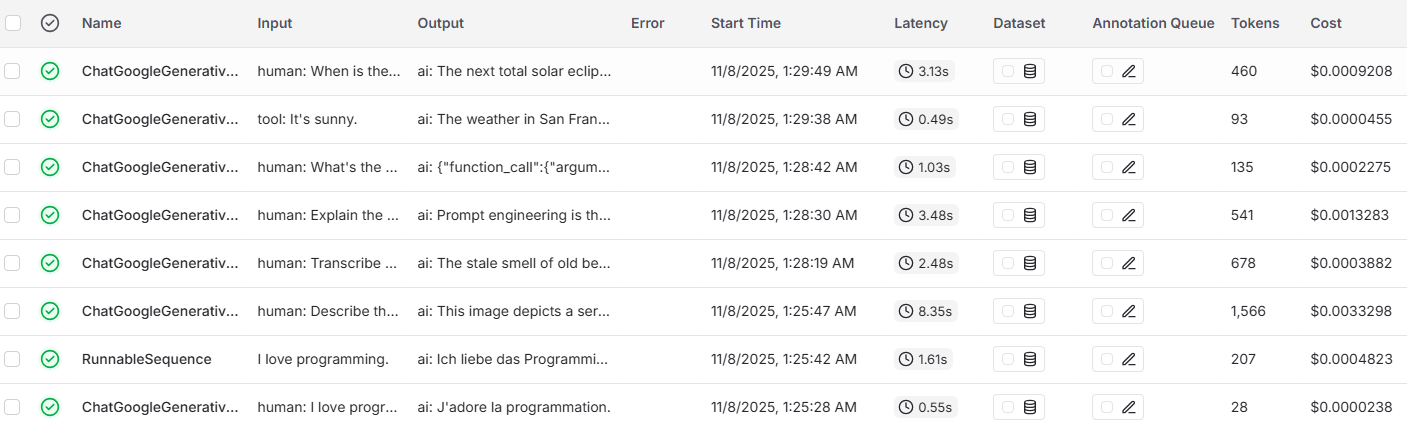